## Keras Classification Project

Let's explore a classification task with Keras API for TF 2.0

### The Data

#### Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        - class:
                - WDBC-Malignant
                - WDBC-Benign

    :Summary Statistics:

    ===================================== ====== ======
                                           Min    Max
    ===================================== ====== ======
    radius (mean):                        6.981  28.11
    texture (mean):                       9.71   39.28
    perimeter (mean):                     43.79  188.5
    area (mean):                          143.5  2501.0
    smoothness (mean):                    0.053  0.163
    compactness (mean):                   0.019  0.345
    concavity (mean):                     0.0    0.427
    concave points (mean):                0.0    0.201
    symmetry (mean):                      0.106  0.304
    fractal dimension (mean):             0.05   0.097
    radius (standard error):              0.112  2.873
    texture (standard error):             0.36   4.885
    perimeter (standard error):           0.757  21.98
    area (standard error):                6.802  542.2
    smoothness (standard error):          0.002  0.031
    compactness (standard error):         0.002  0.135
    concavity (standard error):           0.0    0.396
    concave points (standard error):      0.0    0.053
    symmetry (standard error):            0.008  0.079
    fractal dimension (standard error):   0.001  0.03
    radius (worst):                       7.93   36.04
    texture (worst):                      12.02  49.54
    perimeter (worst):                    50.41  251.2
    area (worst):                         185.2  4254.0
    smoothness (worst):                   0.071  0.223
    compactness (worst):                  0.027  1.058
    concavity (worst):                    0.0    1.252
    concave points (worst):               0.0    0.291
    symmetry (worst):                     0.156  0.664
    fractal dimension (worst):            0.055  0.208
    ===================================== ====== ======

    :Missing Attribute Values: None

    :Class Distribution: 212 - Malignant, 357 - Benign

    :Creator:  Dr. William H. Wolberg, W. Nick Street, Olvi L. Mangasarian

    :Donor: Nick Street

    :Date: November, 1995

This is a copy of UCI ML Breast Cancer Wisconsin (Diagnostic) datasets.
https://goo.gl/U2Uwz2

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [50]:
df = pd.read_csv('DATA/cancer_classification.csv')

In [51]:
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


### EDA

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

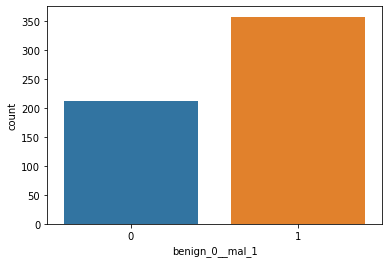

In [52]:
sns.countplot(x='benign_0__mal_1', data=df)

<AxesSubplot:>

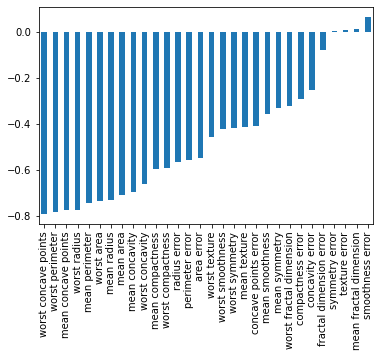

In [53]:
df.corr()['benign_0__mal_1'][:-1].sort_values().plot(kind='bar')

<AxesSubplot:>

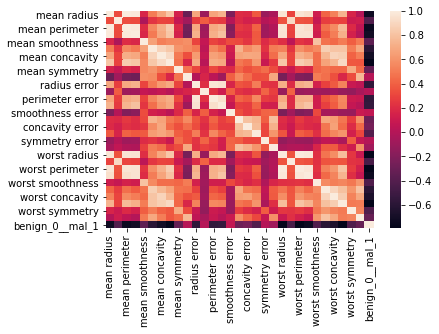

In [54]:
sns.heatmap(df.corr())

In [55]:
X = df.drop('benign_0__mal_1', axis=1).values
y = df['benign_0__mal_1'].values

In [56]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=101)

In [58]:
from sklearn.preprocessing import MinMaxScaler

In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test) # only fit scaler to training date to prevent data leakage

### Creating the model

In [60]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [61]:
X_train.shape

(426, 30)

In [62]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [63]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test))

Epoch 1/600
14/14 [==============================] - 1s 18ms/step - loss: 0.6822 - val_loss: 0.6734
Epoch 2/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6462
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6264 - val_loss: 0.6150
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5940 - val_loss: 0.5811
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5596 - val_loss: 0.5447
Epoch 6/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5229 - val_loss: 0.5045
Epoch 7/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4802 - val_loss: 0.4534
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.4287 - val_loss: 0.3987
Epoch 9/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3793 - val_loss: 0.3512
Epoch 10/600
14/14 [==============================] - 0s 5ms/step - loss: 0.3365 - val_loss: 0.3092
Epoch 11

In [64]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

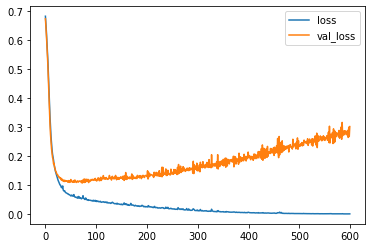

In [65]:
losses.plot()

We see **overfitting**.

### Dealing with overfitting

#### Early stopping callback

In [66]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dense(15, activation='relu'))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [67]:
from tensorflow.keras.callbacks import EarlyStopping

In [69]:
# help(EarlyStopping)

In [71]:
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [72]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 24ms/step - loss: 0.6618 - val_loss: 0.6291
Epoch 2/600
14/14 [==============================] - 0s 6ms/step - loss: 0.6127 - val_loss: 0.5812
Epoch 3/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5629 - val_loss: 0.5339
Epoch 4/600
14/14 [==============================] - 0s 6ms/step - loss: 0.5131 - val_loss: 0.4806
Epoch 5/600
14/14 [==============================] - 0s 6ms/step - loss: 0.4613 - val_loss: 0.4283
Epoch 6/600
14/14 [==============================] - 0s 11ms/step - loss: 0.4110 - val_loss: 0.3786
Epoch 7/600
14/14 [==============================] - 0s 7ms/step - loss: 0.3641 - val_loss: 0.3338
Epoch 8/600
14/14 [==============================] - 0s 6ms/step - loss: 0.3270 - val_loss: 0.2973
Epoch 9/600
14/14 [==============================] - 0s 7ms/step - loss: 0.2940 - val_loss: 0.2670
Epoch 10/600
14/14 [==============================] - 0s 6ms/step - loss: 0.2667 - val_loss: 0.2464
Epoch 1

<AxesSubplot:>

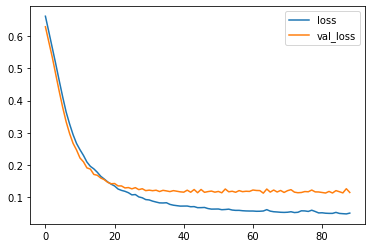

In [73]:
pd.DataFrame(model.history.history).plot()

#### Dropout layers

In [106]:
from tensorflow.keras.layers import Dropout

In [107]:
model = Sequential()

model.add(Dense(30, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(15, activation='relu'))
model.add(Dropout(0.5))

# BINARY CLASSIFICATION
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam')

In [108]:
model.fit(x=X_train, y=y_train, epochs=600, validation_data=(X_test,y_test), 
         callbacks=[early_stop])

Epoch 1/600
14/14 [==============================] - 1s 12ms/step - loss: 0.7211 - val_loss: 0.6941
Epoch 2/600
14/14 [==============================] - 0s 3ms/step - loss: 0.7030 - val_loss: 0.6756
Epoch 3/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6808 - val_loss: 0.6578
Epoch 4/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6538 - val_loss: 0.6371
Epoch 5/600
14/14 [==============================] - 0s 4ms/step - loss: 0.6382 - val_loss: 0.6157
Epoch 6/600
14/14 [==============================] - 0s 5ms/step - loss: 0.6219 - val_loss: 0.5977
Epoch 7/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5961 - val_loss: 0.5658
Epoch 8/600
14/14 [==============================] - 0s 5ms/step - loss: 0.5766 - val_loss: 0.5383
Epoch 9/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5532 - val_loss: 0.5093
Epoch 10/600
14/14 [==============================] - 0s 4ms/step - loss: 0.5460 - val_loss: 0.4811
Epoch 11

<AxesSubplot:>

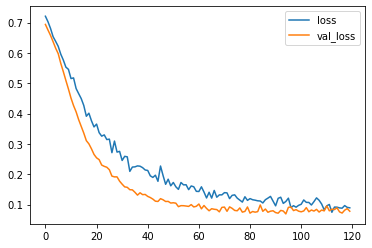

In [109]:
pd.DataFrame(model.history.history).plot()

#### Model evaluation

In [110]:
model.predict(X_test) # the predict_classes function was removed in TF 2.6
# multi-class: np.argmax(model.predict(X_test), axis=1)
# binary: (model.predict(X_test) > 0.5).astype('int32)

array([[9.9223763e-01],
       [9.8844653e-01],
       [9.9160945e-01],
       [4.0284693e-03],
       [9.9762952e-01],
       [9.9750006e-01],
       [9.9928176e-01],
       [1.5737329e-07],
       [9.9471235e-01],
       [9.9761224e-01],
       [4.6756864e-04],
       [9.9485481e-01],
       [9.5625854e-01],
       [9.9807751e-01],
       [3.3405423e-04],
       [9.9946982e-01],
       [9.8184973e-01],
       [9.9818164e-01],
       [1.6687339e-07],
       [6.6292256e-02],
       [9.7955966e-01],
       [9.9940562e-01],
       [9.7658026e-01],
       [9.9723935e-01],
       [9.7262859e-04],
       [9.7651517e-01],
       [6.9289177e-05],
       [9.9949056e-01],
       [5.8402173e-05],
       [2.9590726e-03],
       [3.2370496e-01],
       [8.1664324e-04],
       [6.3920593e-01],
       [1.6922459e-01],
       [9.9683100e-01],
       [9.9846721e-01],
       [7.8720152e-03],
       [2.8091550e-02],
       [2.4405297e-05],
       [2.0144309e-07],
       [2.5496781e-03],
       [9.907203

In [113]:
predictions = (model.predict(X_test) > 0.5).astype('int32')

In [114]:
from sklearn.metrics import classification_report, confusion_matrix

In [115]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97        55
           1       0.99      0.98      0.98        88

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



In [116]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 2 86]]
